In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate

In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

from library.sb_utils import save_file

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
filepath = '../data/processed/'
X = pd.read_csv(filepath + 'X_pre.csv')
y = pd.read_csv(filepath + 'y_pre.csv')

In [5]:
X

,inning,o,p_score,p_throws,stand,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,1,1,0,L,L,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,0,L,L,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,1,1,0,L,L,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,1,1,0,L,L,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,1,1,0,L,L,0.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,4,2,0,R,R,0.0,1.0,2.0,1.0,4.0,0.0,0.0,0.0
21576,4,2,0,R,R,0.0,2.0,2.0,1.0,5.0,0.0,0.0,0.0
21577,4,3,0,R,L,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
21578,4,3,0,R,L,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0


In [21]:
y

,pitch_type
0,FF
1,FF
2,FF
3,FF
4,CU
...,...
21575,FF
21576,CH
21577,CH
21578,CH


In [22]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [23]:
X_drop = pd.get_dummies(X, drop_first = True)

In [24]:
scaler = StandardScaler()
X_s = scaler.fit_transform(X_drop)

In [25]:
y_encoder = LabelEncoder()

In [26]:
y_array = y.to_numpy().flatten()
y_enc = y_encoder.fit(y_array)

In [27]:
y_enc.classes_

array(['CH', 'CU', 'FC', 'FF', 'FT', 'SI', 'SL'], dtype=object)

In [29]:
y1 = y_enc.transform(y_array)

In [30]:
y1.shape

(21580,)

# Question

Im not currently using the cells until the bold Resume (5 cells down). Trying to figure out whether or not to fit an encoder (as opposed to using get_dummies) to add to a pipeline is necessary. If it is, I was having a bit of trouble dealing with having both numerical and categorical columns in the data to fit the encoder on. 

In [33]:
tbe= X.loc[:,['p_throws','stand']]

In [39]:
x_enc = OneHotEncoder(drop='first')
x_enc.fit(X.loc[:,['p_throws','stand']])
new = x_enc.transform(tbe).toarray()
new.shape

(21580, 2)

In [40]:
X['p_throws'] = new[:,0]
X['stand'] = new[:,1]
X

,inning,o,p_score,p_throws,stand,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,1,1,0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,1,1,0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,1,1,0,0.0,0.0,0.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,4,2,0,1.0,1.0,0.0,1.0,2.0,1.0,4.0,0.0,0.0,0.0
21576,4,2,0,1.0,1.0,0.0,2.0,2.0,1.0,5.0,0.0,0.0,0.0
21577,4,3,0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
21578,4,3,0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0


In [44]:
enc1 = OneHotEncoder(drop = 'first')
enc1.fit(X)

OneHotEncoder(drop='first')

In [45]:
enc1.transform(X).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

# Resume

In [86]:
#split data into train and test sets 80/20
X_train, X_test, y_train, y_test = train_test_split(X_s, y1, test_size = 0.2, random_state = 123)

For now we will use accuracy as our main metric, while also looking at f1, roc_auc_score, recall and precision. For the latter measures, I felt a weighted average would be more informative than a micro or macro average. This isn't based on any strong backing so maybe this will be changed in the future. Another note is that due to the nature of the project, we don't have an particular need to worry about false positives or false negatives more than one another, the way we would for something involving medicine or other higher stakes scenarios. 

Lets start by creating a dummy classifier set to always predict the most frequent classification (4 seam fastball, labeled FF, which occurs 42.5% of the time).

In [33]:
from sklearn.dummy import DummyClassifier

In [34]:
dumb = DummyClassifier(strategy = 'most_frequent')

In [35]:
dumb.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [36]:
y_pred = dumb.predict(X_test)
dumb.score(X_test, y_test)

0.4258572752548656

In [37]:
from sklearn.metrics import roc_auc_score

In [38]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#verify that accuracy_score and model.score agree
accuracy_score(y_pred, y_test)

0.4258572752548656

In [39]:
y_test

array([3, 3, 3, ..., 3, 0, 3])

In [40]:
dumb.predict_proba(X_test).shape

(4316, 7)

In [41]:
roc_auc_score(y_test, dumb.predict_proba(X_test), multi_class = 'ovo')

0.5

### Here are a couple functions that will be used to get quick metrics from our models

Here is a function to plot the confusion matrix and print the f1 and accuracy score for a given model. 
Right now we will use average = 'weighted'

In [42]:
def plot_cm(model):
    fig, ax = plt.subplots(figsize=(8,6))
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    print('accuracy ',accuracy_score(predictions,y_test))
    print('f1 ',f1_score(y_test,predictions, average = 'weighted'))
    disp = ConfusionMatrixDisplay(cm, display_labels = model.classes_)
    disp.plot(ax=ax)
    
    #plt.show()

And here is a function to quickly give us the Recall, Precision, and AUC-ROC-Score (area under the ROC curve). In these we will use a weighted average as well. 

In [43]:
from sklearn.metrics import recall_score, precision_score
def ez_mets(model):
    preds = model.predict(X_test)
    print('Recall ', recall_score(y_test,preds,average = 'weighted'))
    print('Precision ', precision_score(y_test,preds,average = 'weighted', zero_division = 0))
    print("AUC-ROC-Score ", roc_auc_score(y_test, model.predict_proba(X_test), multi_class = 'ovr'))

accuracy  0.4258572752548656
f1  0.25437948388639675


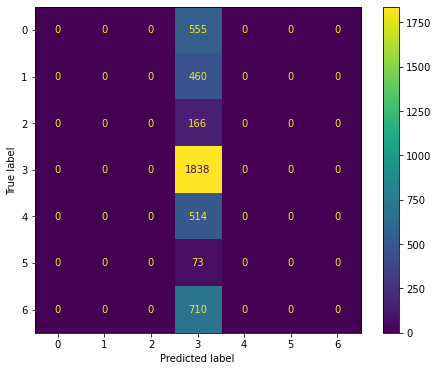

In [44]:
plot_cm(dumb)

In [45]:
ez_mets(dumb)

Recall  0.4258572752548656
Precision  0.1813544188874984
AUC-ROC-Score  0.5


Now we will look at different classifiers and how they perform on our test data. For now, we will not tune any hyperparameters (leave them on default settings). 

## First try : Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [47]:
X_test.shape

(4316, 13)

In [48]:
y_pred = lr.predict(X_test)
lr.score(X_test, y_test.reshape(-1,1))

0.42539388322520855

In [49]:
y_pred.shape

(4316,)

In [50]:
accuracy_score(y_pred, y_test)

0.42539388322520855

accuracy  0.42539388322520855
f1  0.28117268326171374


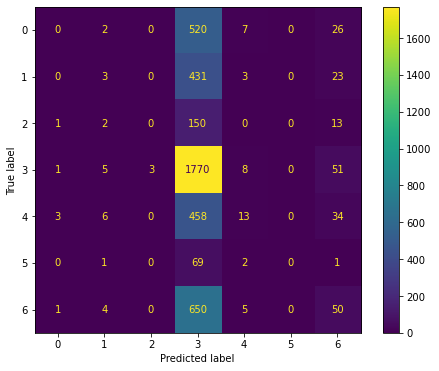

In [51]:
plot_cm(lr)

In [52]:
ez_mets(lr)

Recall  0.42539388322520855
Precision  0.2823924891502984
AUC-ROC-Score  0.6859116827482351


## Second try : Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt = DecisionTreeClassifier()

In [55]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

accuracy  0.32020389249304915
f1  0.3193536552948378


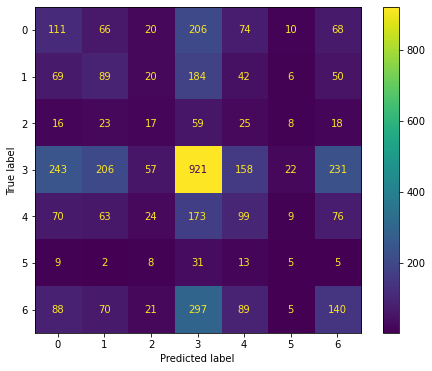

In [56]:
plot_cm(dt)

In [57]:
ez_mets(dt)

Recall  0.32020389249304915
Precision  0.3194230386861227
AUC-ROC-Score  0.546018787395852


## Third try: Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [59]:
rf.fit(X_train,y_train)

RandomForestClassifier()

accuracy  0.35240963855421686
f1  0.32460496064547356


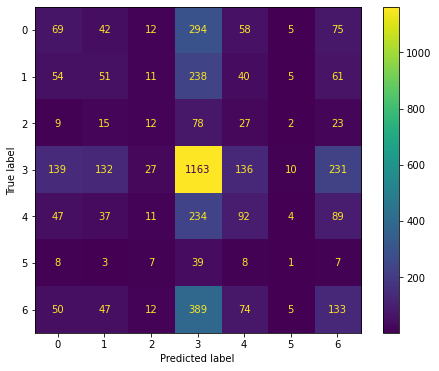

In [60]:
plot_cm(rf)

In [61]:
ez_mets(rf)

Recall  0.35240963855421686
Precision  0.3096959012443304
AUC-ROC-Score  0.6559804978076171


The 3 models on default parameter settings have fairly similar accuracy scores, however their confusion matrix shows that they arrived at that score differently. The Logistic Regression model arrived at a score very similar to that of the dummy classifier (set to predict the most_common label), by overwhelmingly predicting the most common label. The dt and rf models both showed a much more balanced set of predictions but with lower accuracy scores.

## Model 4 Gradient Boosting Classifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()


In [63]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

accuracy  0.43234476367006486
f1  0.30868828698915424


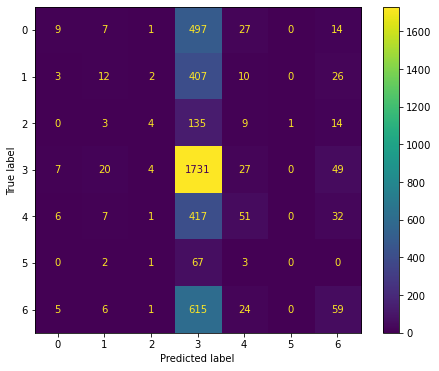

In [64]:
plot_cm(gb)

In [65]:
ez_mets(gb)

Recall  0.43234476367006486
Precision  0.3527865677239461
AUC-ROC-Score  0.7256355165277716


Out of the box, the gradient boosting classifier seems to show the most promise out of the 4 non dummy classifiers we tried. The decision tree and random forest both were more "ambitious" with their predictions, having a much more diverse, if less accurate prediction set.

The F1 scores were better on the decision tree and random forest models.
The logistic regression and gradient boosting models both predicted the four seam fastball an overwhelming majority of the time. 

It would be interesting to see if the end result distribution should be a concern....

I.e. would we rather have a model that has a better pitch by pitch accuracy but has a distribution very unrepresentative of the target distribution (i.e. the dummie classifier predicting fourseam fb 100% of the time) Or, a model that has lower pitch by pitch accuracy, but gets the distribution closer. 

Now we want to work on improving our predictions. 

From here, we can look to improve our model in a couple different ways. We could start experimenting with the hyperparameters of the models, or we could try to go back to our data and either use sampling methods (SMOTE, etc) to train our model on a more evenly distributed set of data, or add data from the original pitch csv files (recall that we started with ~2,500,000 rows, and are now only working with 21,580). 

# SMOTE

In [101]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [99]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


Re-import our data

In [73]:
y = pd.read_csv(filepath + 'y_pre.csv')

In [74]:
X = pd.read_csv(filepath + 'X_pre.csv')

In [75]:
y.value_counts()

pitch_type
FF            9201
SL            3637
CH            2667
FT            2635
CU            2282
FC             814
SI             344
dtype: int64

In [76]:
X_drop = pd.get_dummies(X, drop_first = True)

In [77]:
scaler = StandardScaler()
X_s = scaler.fit_transform(X_drop)

In [78]:
y_encoder = LabelEncoder()

In [79]:
y_array = y.to_numpy().flatten()
y_enc = y_encoder.fit(y_array)

In [80]:
y_enc.classes_

array(['CH', 'CU', 'FC', 'FF', 'FT', 'SI', 'SL'], dtype=object)

In [81]:
y1 = y_enc.transform(y_array)

In [82]:
y1.shape

(21580,)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y1, test_size = 0.2, stratify=y1, random_state = 123)

Out of curiosity I wanted to see if the stratify specification here would change model performance. Interesting that this following error message occured only here

In [89]:
lr.fit(X_train,y_train)

C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
ez_mets(lr)

Recall  0.41682113067655235
Precision  0.2590544767100749
AUC-ROC-Score  0.6776151897807662


accuracy  0.41682113067655235
f1  0.2777401609655689


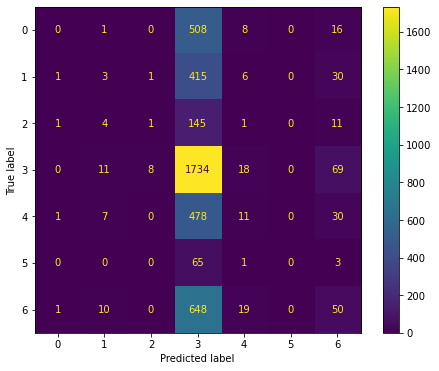

In [91]:
plot_cm(lr)

The scores were more or less consistent with what we saw earlier. Now we will try to utilize SMOTE. 

In [92]:
oversample = SMOTE()
X_tr, y_tr = oversample.fit_resample(X_train, y_train)

In [93]:
Counter(y_train)

Counter({3: 7361, 1: 1826, 6: 2909, 4: 2108, 0: 2134, 2: 651, 5: 275})

In [94]:
Counter(y_tr)

Counter({3: 7361, 1: 7361, 6: 7361, 4: 7361, 0: 7361, 2: 7361, 5: 7361})

You can see that there are now 7361 representatives of every pitch type in the training data

In [95]:
lr.fit(X_tr, y_tr)

LogisticRegression()

accuracy  0.2411955514365153
f1  0.27103330454631175


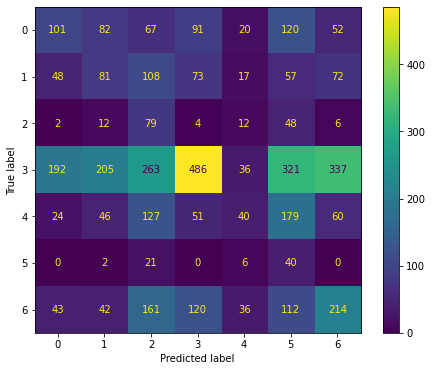

In [96]:
plot_cm(lr)

In [97]:
ez_mets(lr)

Recall  0.2411955514365153
Precision  0.3820723694284376
AUC-ROC-Score  0.6633408301955459


In [96]:
lr.score(X_test, y_test)

0.24559777571825764

## Note to discuss this section on smote

In [103]:
steps = [('over', SMOTE()), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train,y_train)

Pipeline(steps=[('over', SMOTE()), ('model', LogisticRegression())])

accuracy  0.2428174235403151
f1  0.27273960381049933


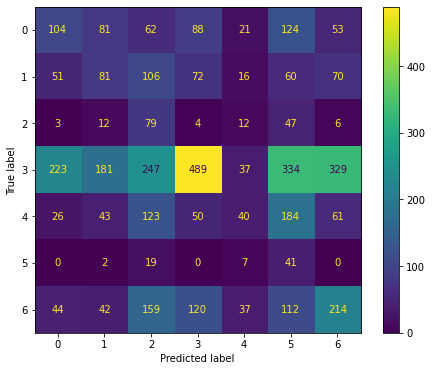

In [104]:
plot_cm(pipeline)

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
over = SMOTE()
under = RandomUnderSampler()
steps = [('over', over), ('under', under), ('model', RandomForestClassifier())]
#from sklearn.ensemble import RandomForestClassifier
#steps = [ ('model', RandomForestClassifier())]
pipeline = Pipeline(steps=steps)

In [107]:
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 12)
scores = cross_val_score(pipeline, X_s, y1, scoring = 'accuracy',n_jobs = -2)
print(scores)

[0.29888786 0.3081557  0.3313253  0.3199722  0.32344764]


Clearly the performance was affected, I'm not entirely sure how to interpret the results or procede with more sampling based techniques at the moment however. 

#  I Begin Hyperparameter tuning here

Recall that the gradient boosting classifier seemed to have the best performance out of the box.

In [123]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:

dpts = np.arange(3,25,3)
n_estimators = [50,100,200]
#my_grid = {'n_estimators': n_estimators,
#           'max_features': max_features,
#           'min_samples_split': min_samples_split,
#           'min_samples_leaf': min_samples_leaf,
#           'bootstrap': bootstrap}
grid_gb = {'max_depth':dpts, 'n_estimators' : n_estimators}
gb = GradientBoostingClassifier()
CV_gb = RandomizedSearchCV(estimator=gb, param_distributions=grid_gb, cv= 5, n_jobs = -2 , verbose = -2)
CV_gb.fit(X_train, y_train)
print(CV_gb.best_params_)


In [126]:
CV_gb.best_params_

{'n_estimators': 100, 'max_depth': 3}

In [125]:
CV_gb.cv_results_

{'mean_fit_time': array([  8.79874253,  84.7796699 , 145.42477322, 587.65584474,
        158.55808744, 341.22880535, 103.6721065 ,   7.87765207,
        408.18654132, 262.41859016]),
 'std_fit_time': array([0.10766535, 0.45716469, 0.5802147 , 1.01606521, 0.39881838,
        0.6374571 , 0.67630525, 0.06548966, 1.61202224, 1.37560757]),
 'mean_score_time': array([0.04022932, 0.26230516, 0.27778831, 6.2521924 , 0.28309274,
        0.72308817, 0.19576974, 0.04623156, 0.68445096, 0.44496369]),
 'std_score_time': array([9.00567147e-04, 1.24704161e-02, 2.65394591e-02, 1.56395465e+00,
        8.27262706e-03, 6.15304310e-02, 1.23167593e-03, 3.10569792e-03,
        1.28557622e-02, 1.91476374e-02]),
 'param_n_estimators': masked_array(data=[100, 100, 50, 200, 50, 100, 50, 50, 200, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 12, 18, 

accuracy  0.43234476367006486
f1  0.30868828698915424


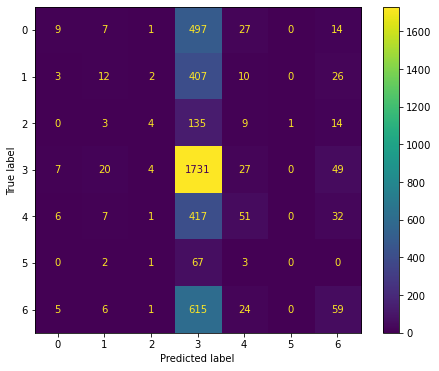

In [127]:
plot_cm(CV_gb)

In [128]:
ez_mets(CV_gb)

Recall  0.43234476367006486
Precision  0.3527865677239461
AUC-ROC-Score  0.7256356281235805


    #from stackoverflowlink
    #https://stackoverflow.com/questions/58781601/parameter-tuning-using-gridsearchcv-for-gradientboosting-classifier-in-python
    parameters = {
        "loss":["deviance", "exponential"],
        "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
        "min_samples_split": np.linspace(0.1, 0.5, 4),
        "min_samples_leaf": np.linspace(0.1, 0.5, 4),
        "max_depth":[3,5,8],
        "max_features":["log2","sqrt"],
        "criterion": ["friedman_mse",  "mae"],
        "subsample":[0.5, 0.7, 0.85, 1.0],
        "n_estimators":[10,40,80,120]
        }

In [130]:
#copy of parameters above and changed a couple names before running
dpts = np.arange(3,25,3)
n_estimators = [50,11.5-Capstone2-EDA-2022.ipynb00,200]
#my_grid = {'n_estimators': n_estimators,
#           'max_features': max_features,
#           'min_samples_split': min_samples_split,
#           'min_samples_leaf': min_samples_leaf,
#           'bootstrap': bootstrap}
grid_gb2 = {'max_depth':dpts, 'n_estimators' : n_estimators}
parameters = {
    "loss":["deviance", "exponential"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 4),
    "min_samples_leaf": np.linspace(0.1, 0.5, 4),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.7, 0.85, 1.0],
    "n_estimators":[10,40,80,120]
    }
gb2 = GradientBoostingClassifier()
CV_gb2 = RandomizedSearchCV(estimator=gb2, param_distributions=parameters, cv= 5, n_jobs = -2 , verbose = 2, n_iter = 25)
CV_gb2.fit(X_train, y_train)
print(CV_gb2.best_params_)
#print(CV_rf.cv_results_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\alber\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.42649445 0.42713151        nan        nan 0.42655237        nan
 0.42649445 0.42649445 0.42649445 0.42649445        nan 0.42649445
 0.42678411        nan        nan 0.42649445        nan 0.42649445
 0.42649445        nan 0.42649445 0.42753709        nan        nan
 0.42649445]
  warnings.warn(
C:\Users\alber\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


{'subsample': 0.85, 'n_estimators': 40, 'min_samples_split': 0.1, 'min_samples_leaf': 0.1, 'max_features': 'sqrt', 'max_depth': 5, 'loss': 'deviance', 'learning_rate': 0.15, 'criterion': 'mae'}


In [133]:
CV_gb2.cv_results_

{'mean_fit_time': array([3.82456751e+00, 8.06214023e+00, 8.55445862e-03, 3.96523476e-03,
        5.61343861e+00, 8.74543190e-03, 7.44415760e-01, 2.19490972e+00,
        9.82317638e-01, 1.47693459e+02, 5.95340729e-03, 1.74851971e+00,
        1.27894948e+02, 3.91588211e-03, 3.59630585e-03, 4.30040698e+00,
        3.80606651e-03, 1.20503678e+00, 3.62807035e-01, 2.90074348e-03,
        2.70195293e-01, 2.23500045e+02, 3.22790146e-03, 2.83145905e-03,
        2.54258804e+00]),
 'std_fit_time': array([2.48193988e-02, 3.99430057e-02, 2.54620448e-03, 6.18131764e-04,
        3.16493235e-02, 1.45162355e-03, 8.09349212e-03, 5.59546922e-02,
        2.22326675e-02, 1.57413254e+00, 1.27268875e-03, 1.80169700e-02,
        2.64704777e+00, 1.43325622e-03, 8.50656321e-04, 7.10941126e-02,
        1.20005311e-03, 3.05488406e-02, 9.02405594e-03, 1.78050995e-04,
        1.55933399e-02, 1.37099819e+00, 2.52687857e-04, 2.54032462e-04,
        1.00796056e-01]),
 'mean_score_time': array([0.00580678, 0.04292021, 

accuracy  0.4281742354031511
f1  0.2626216160918489


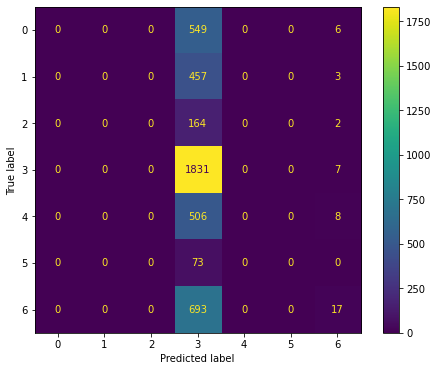

In [131]:
plot_cm(CV_gb2)

In [134]:
ez_mets(CV_gb2)

Recall  0.4281742354031511
Precision  0.24751831839721108
AUC-ROC-Score  0.6941724592052918


# END (currently)

The additional cells are either from an additional notebook (mentioned below), or just scratchwork.

### The following cells are from a separate notebook where I did the same steps above but for a binary classification (fastball or not). 

I just copy pasted them here as a reference. 

In [135]:
CV_GS_GB = GridSearchCV(estimator=gb, param_grid=grid_gb, cv= 5, n_jobs = -2)
CV_GS_GB.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-2,
             param_grid={'max_depth': array([ 3,  6,  9, 12, 15, 18, 21, 24]),
                         'n_estimators': [50, 100, 200]})

In [136]:
print(CV_GS_GB.best_params_)
CV_GS_GB.cv_results_

{'max_depth': 6, 'n_estimators': 50}


{'mean_fit_time': array([ 0.48841248,  0.97041197,  2.0084115 ,  0.92859955,  1.98819928,
         3.93071084,  1.94300351,  3.69011102,  7.46690993,  4.45879803,
         9.44148698, 22.09127998,  9.70268679, 23.78465843, 57.50130148,
        14.45241866, 35.11254101, 83.81244774, 17.64015641, 38.42951994,
        78.66471953, 17.25090199, 34.74371815, 54.31165762]),
 'std_fit_time': array([0.01044228, 0.00791455, 0.02261491, 0.00949972, 0.05068503,
        0.0503367 , 0.02570144, 0.04603303, 0.116889  , 0.0958675 ,
        0.2170511 , 0.14773841, 0.14005201, 0.32035544, 0.67986722,
        0.40555663, 0.37384597, 1.01420468, 0.24243808, 0.6462154 ,
        1.53643076, 0.17770025, 0.46306562, 0.76779942]),
 'mean_score_time': array([0.00399976, 0.00679998, 0.01139984, 0.00680866, 0.0119997 ,
        0.0210001 , 0.01239581, 0.01860003, 0.03839951, 0.01620002,
        0.03259983, 0.06904836, 0.02300005, 0.0481998 , 0.10859981,
        0.0276001 , 0.06099992, 0.13480163, 0.03655581, 0.06

accuracy  0.5896663577386468
f1  0.7059604848082351


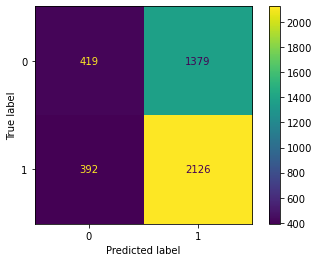

In [137]:
plot_cm(CV_GS_GB)

accuracy  0.5813253012048193
f1  0.7265849599031623


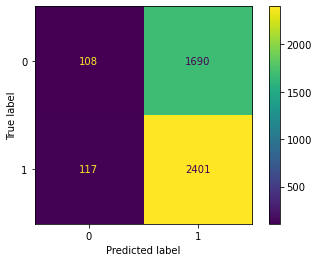

In [130]:
plot_cm(CV_rf)

accuracy  0.5892029657089898
f1  0.711472742066721


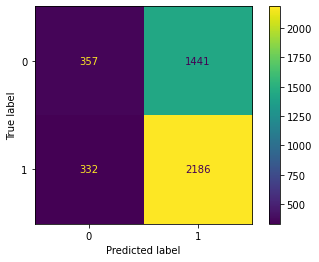

In [121]:
plot_cm(gb2)

In [96]:
rf.score(X_test,y_test)

0.5609360518999074

In [104]:
rf2 = RandomForestClassifier(n_estimators = 500, n_jobs = -2)
rf2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-2)

accuracy  0.5567655236329935
f1  0.6418273731510952


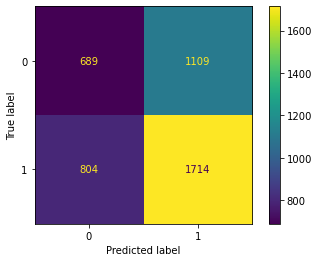

In [105]:
plot_cm(rf2)

In [117]:
#rf2.estimators_

In [110]:
rf2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': -2,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# SMOTE (imblearn)

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [106]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [113]:
over = SMOTE(sampling_strategy=0.1)

under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', RandomForestClassifier())]
#steps = [ ('model', RandomForestClassifier())]
pipeline = Pipeline(steps=steps)

In [118]:
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 12)
scores = cross_val_score(pipeline, X_s, y1, scoring = 'accuracy',n_jobs = -2)
print(scores)

[0.30583874 0.30931418 0.32854495 0.3139481  0.32854495]


In [107]:
rf.score(X_test,y_test)

0.3602873030583874

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y.to_numpy(), test_size = 0.2, random_state = 123)


In [97]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

    cm = confusion_matrix(y_test, y_pred)
    #ConfusionMatrixDisplay(confusion_matrix(Ytest, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=dumb.classes_)
    disp.plot()
    plt.show()